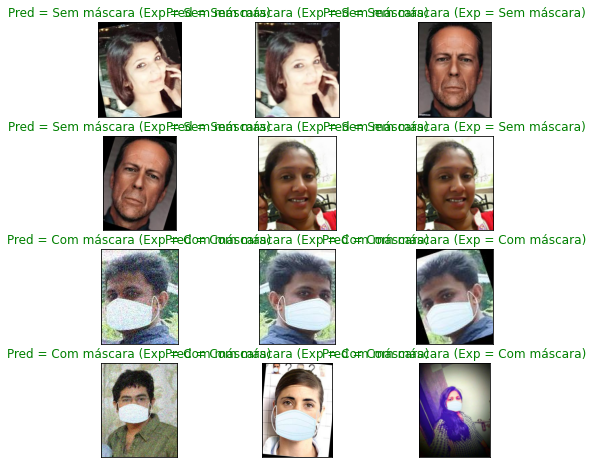

In [7]:
import os

#  Para ignorar os warnings, caso não seja possível usar a GPU com o tensorflow.
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

from glob import glob
from keras.models import load_model
from keras_preprocessing.image import img_to_array, load_img
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Carregando uma lista com os nomes das imagens de teste.
test_set = glob("./test/**/*.jpg")

# Carregando um modelo previamente treinadod.
net_model = load_model("mask_model.hdf5")

# Criando um vetor com as imagens de teste para verificar se a rede aprendeu como separar as classes.
test_imgs = np.array([img_to_array(load_img(image_name, target_size=(256,256), color_mode="rgb"))/255 for image_name in test_set])

# Recuperando os resultados vindos da predição da rede.
y_pred = net_model.predict(test_imgs)
# Valores esperados.
y_true = [0,0,0,0,0,0,0,1,1,1,1,1,1]
# Classes.
labels = ["Sem máscara", "Com máscara"]

figure = plt.figure(figsize=(8, 8))


for i in range(12):
    ax = figure.add_subplot(4, 3, i+1, xticks=[], yticks=[])
    img = mpimg.imread(test_set[i])
    ax.imshow(img)
    predict_index = np.argmax(y_pred[i])
    true_index = y_true[i]
    ax.set_title(f"Pred = {labels[predict_index]} (Exp = {labels[true_index]})", color="green" if predict_index == true_index else "red")

plt.show()